<a href="https://colab.research.google.com/github/szymros/kaggle-titanic/blob/main/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf

data = pd.read_csv('train.csv')
data.pop(item='Name')
data.pop(item='Ticket')
data.pop(item='PassengerId')
y_train = data.pop(item='Survived')
s = pd.get_dummies(data['Sex'])
pclass = pd.get_dummies(data['Pclass'], prefix="class")
data.pop(item='Sex')
data.pop(item='Pclass')
data.pop(item='Embarked')
data = data.join(s)
data = data.join(pclass)
data.pop(item='Cabin')
data['Age'].fillna(0, inplace=True)
X = data.values
X[:,0] = tf.keras.utils.normalize(X[:,0])
X[:,3] = tf.keras.utils.normalize(X[:,3])
X.shape, data

((891, 9),
       Age  SibSp  Parch     Fare  female  male  class_1  class_2  class_3
 0    22.0      1      0   7.2500       0     1        0        0        1
 1    38.0      1      0  71.2833       1     0        1        0        0
 2    26.0      0      0   7.9250       1     0        0        0        1
 3    35.0      1      0  53.1000       1     0        1        0        0
 4    35.0      0      0   8.0500       0     1        0        0        1
 ..    ...    ...    ...      ...     ...   ...      ...      ...      ...
 886  27.0      0      0  13.0000       0     1        0        1        0
 887  19.0      0      0  30.0000       1     0        1        0        0
 888   0.0      1      2  23.4500       1     0        0        0        1
 889  26.0      0      0  30.0000       0     1        1        0        0
 890  32.0      0      0   7.7500       0     1        0        0        1
 
 [891 rows x 9 columns])

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,0.024906,1.0,0.0,0.004103,0.0,1.0,0.0,0.0,1.0
1,0.043020,1.0,0.0,0.040344,1.0,0.0,1.0,0.0,0.0
2,0.029435,0.0,0.0,0.004485,1.0,0.0,0.0,0.0,1.0
3,0.039624,1.0,0.0,0.030053,1.0,0.0,1.0,0.0,0.0
4,0.039624,0.0,0.0,0.004556,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.030567,0.0,0.0,0.007358,0.0,1.0,0.0,1.0,0.0
887,0.021510,0.0,0.0,0.016979,1.0,0.0,1.0,0.0,0.0
888,0.000000,1.0,2.0,0.013272,1.0,0.0,0.0,0.0,1.0
889,0.029435,0.0,0.0,0.016979,0.0,1.0,1.0,0.0,0.0


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(60, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(60, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
              )
history = model.fit(X, y_train, epochs=200, batch_size=X.size)


Epoch 1/200
1/1 [==============================] - 1s 882ms/step - loss: 0.7000 - accuracy: 0.6150
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6896 - accuracy: 0.6195
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6797 - accuracy: 0.6274
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6703 - accuracy: 0.6308
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6615 - accuracy: 0.6330
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6532 - accuracy: 0.6319
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6455 - accuracy: 0.6319
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6384 - accuracy: 0.6330
Epoch 9/200
1/1 [==============================] - 0s 15ms/step - loss: 0.6316 - accuracy: 0.6330
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6251 - accuracy: 0.6375
Epoch 11/200
1/1 [======

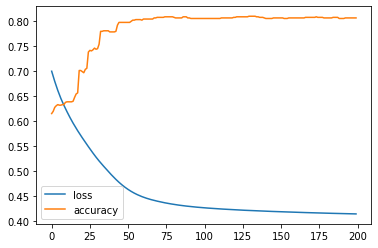

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

In [ ]:
data2 = pd.read_csv('test.csv')
data2.pop(item='Name')
data2.pop(item='Ticket')
data2.pop(item='PassengerId')
s = pd.get_dummies(data2['Sex'])
pclass = pd.get_dummies(data2['Pclass'], prefix="class")
data2.pop(item='Sex')
data2.pop(item='Pclass')
data2.pop(item='Embarked')
data2 = data2.join(s)
data2 = data2.join(pclass)
data2.pop(item='Cabin')
data2['Age'].fillna(0, inplace=True)
data2['Fare'].fillna(0, inplace=True)
X_test = data2.values
X_test[:,0] = tf.keras.utils.normalize(X_test[:,0])
X_test[:,3] = tf.keras.utils.normalize(X_test[:,3])
X_test.shape, data2

((418, 9),
       Age  SibSp  Parch      Fare  female  male  class_1  class_2  class_3
 0    34.5      0      0    7.8292       0     1        0        0        1
 1    47.0      1      0    7.0000       1     0        0        0        1
 2    62.0      0      0    9.6875       0     1        0        1        0
 3    27.0      0      0    8.6625       0     1        0        0        1
 4    22.0      1      1   12.2875       1     0        0        0        1
 ..    ...    ...    ...       ...     ...   ...      ...      ...      ...
 413   0.0      0      0    8.0500       0     1        0        0        1
 414  39.0      0      0  108.9000       1     0        1        0        0
 415  38.5      0      0    7.2500       0     1        0        0        1
 416   0.0      0      0    8.0500       0     1        0        0        1
 417   0.0      1      1   22.3583       0     1        0        0        1
 
 [418 rows x 9 columns])

In [ ]:
X_test

array([[0.05665483, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.07718194, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.10181448, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.06322351, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
predictions = model.predict(X_test)
predictions = tf.round(predictions)
predictions = tf.squeeze(predictions)
predictions.shape

TensorShape([418])

In [ ]:
d = {'PassengerId': [i for i in range(892,1310)], 'Survived' : predictions }
df = pd.DataFrame(d)
df.to_csv('predictions.csv')